<a href="https://colab.research.google.com/github/otaviocelani/exercicioData/blob/master/exercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício - Data Science 
### Autor: Otávio Celani

(Adaptado de Morettin & Bussab)

A planilha abaixo apresenta informações sobre o estado civil, grau de instrução, número de filhos, salário
(em salários mínimos), idade (medida em anos) e região de procedência (capital, interior do estado de
Minas Gerais ou outro estado do Brasil) de 36 funcionários da seção de orçamentos da Companhia Milsa.

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/plan1.csv")  # importação da planilha 

data.columns = ["id", "estadoCivil","nivelEnsino", "filhos", "salario", "idade", "origem"]
data.head()

,id,estadoCivil,nivelEnsino,filhos,salario,idade,origem
0,1,Solteiro,Fundamental,*,4,26,Interior
1,2,Casado,Fundamental,1,"4,56",32,Capital
2,3,Casado,Fundamental,2,"5,25",36,Capital
3,4,Solteiro,Médio,*,"5,73",20,Outro
4,5,Solteiro,Fundamental,*,"6,26",40,Outro


# a) (1,5pts) Classifique cada uma das variáveis do arquivo. 

**Estado civil:** Var. qualitativa nominal

**Grau de instrução:** Var. qualitativa ordinal

**Número de filhos:** Var. quantitativa discreta

**Salário:** Var. quantitativa contínua

**Idade:** Var. quantitativa discreta

**Região de procedência:** Var. qualitativa nominal

# b) (2pts) Construa tabelas para cada uma das variáveis: Estado civil, grau de instrução, nº de filhos e procedência. 

In [0]:
freqCiv = data['estadoCivil'].value_counts()  # frequencia
percentCiv = data['estadoCivil'].value_counts(normalize = True)  # porcentagem
frame = pd.DataFrame({'Frequência': freqCiv, 'Porcentagem' : percentCiv.map('{:,.2%}'.format) })  # tabela
frame.rename_axis('Estado Civil', axis = 'columns', inplace = True)
frame

Estado Civil,Frequência,Porcentagem
Casado,20,55.56%
Solteiro,16,44.44%


In [0]:
freqEdu = data['nivelEnsino'].value_counts()  # frequencia
percentEdu = data['nivelEnsino'].value_counts(normalize = True)  # porcentagem
frame = pd.DataFrame({'Frequência': freqEdu, 'Porcentagem' : percentEdu.map('{:,.2%}'.format) })  # tabela
frame.rename_axis('Nível de Ensino', axis = 'columns', inplace = True)
frame

Nível de Ensino,Frequência,Porcentagem
Médio,18,50.00%
Fundamental,12,33.33%
Superior,6,16.67%


In [0]:
freqFilhos = data['filhos'].value_counts()  # frequencia
percentFilhos = data['filhos'].value_counts(normalize = True)  # porcentagem
frame = pd.DataFrame({'Frequência': freqFilhos, 'Porcentagem' : percentFilhos.map('{:,.2%}'.format) })  # tabela
frame.rename_axis('Filhos', axis = 'columns', inplace = True)
frame

Filhos,Frequência,Porcentagem
*,16,44.44%
2,7,19.44%
1,5,13.89%
0,4,11.11%
3,3,8.33%
5,1,2.78%


In [0]:
freqOrigem = data['origem'].value_counts()  # frequencia
percentOrigem = data['origem'].value_counts(normalize = True)  # porcentagem
frame = pd.DataFrame({'Frequência': freqOrigem, 'Porcentagem' : percentOrigem.map('{:,.2%}'.format) })  # tabela
frame.rename_axis('Origem', axis = 'columns', inplace = True)
frame

Origem,Frequência,Porcentagem
Outro,13,36.11%
Interior,12,33.33%
Capital,11,30.56%


# c) (2,75pts) Com base nas tabelas construídas na letra b, complete: 

Dos 36 funcionários **20** são casados, que corresponde a **55,55%**.

Com relação ao grau de instrução, **30** funcionários não têm curso superior, que corresponde a **83.33%** do total de funcionários.

Um total de **16** funcionários não informaram o número de filhos. 

Um total de **16** **(43%)** têm menos de 3 filhos. Somente **4 (11%)** têm mais de 3 filhos. 

Um total de **23** funcionários são do estado de Minas Gerais. 


# d) (1 pt)Construa uma tabela cruzada para as variáveis: Grau de instrução e região de procedência. 

In [0]:
pd.crosstab(data.origem, data.nivelEnsino, rownames = [''], colnames = ['Frequência'])

Frequência,Fundamental,Médio,Superior
,,,
Capital,4,5,2
Interior,3,7,2
Outro,5,6,2


In [0]:
tb = pd.crosstab(data.origem, data.nivelEnsino, rownames = [''], colnames = ['Porcentagem'], normalize = True)
pd.options.display.float_format = '{:,.2%}'.format
tb

Porcentagem,Fundamental,Médio,Superior
,,,
Capital,11.11%,13.89%,5.56%
Interior,8.33%,19.44%,5.56%
Outro,13.89%,16.67%,5.56%


# e) (3,5pts) A partir da tabela construída na letra d, responda:

#### 1. Qual é a porcentagem de funcionários que têm o ensino médio?

**50%**

#### 2. Qual é a porcentagem de funcionários que são de outro estado?

**16,66%**

#### 3. Qual é a porcentagem de funcionários que têm o ensino médio e são do interior? 

**33%**

#### 4. Dentre os funcionários do interior, quantos por cento têm o ensino médio?  

**19,44%**

#### 5. Dentre os funcionários da capital, quantos por cento têm curso superior? 

**5.55%**

#### 6. Dentre os funcionários que têm curso superior, quantos por cento são do interior? 

**5,55%**

#### 7. Dentre os funcionários que têm ensino fundamental, quantos por cento são de outro estado? 

**13.88%**

# f) Complete a tabela de síntese numérica:

In [0]:
salarioStr = data['salario']
salarioStr = [float(salario.replace(',','.') )for salario in salarioStr]  # data wrangling
salarios = pd.DataFrame(salarioStr)*1000 
salarios.columns = ["Salário"]
pd.options.display.float_format = 'R${:,.2f}'.format
salarios.head()

,Salário
0,"R$4,000.00"
1,"R$4,560.00"
2,"R$5,250.00"
3,"R$5,730.00"
4,"R$6,260.00"


In [0]:
cv = salarios.std() / salarios.mean()   # coeficiente de variação

variance = pd.DataFrame(cv.map('{:,.2%}'.format))
variance.columns = ["Salário"]
variance.index = ["var"]

df = salarios.describe().drop('count')

pd.options.display.float_format = 'R$ {:,.2f}'.format

tb = variance.append(df, ignore_index = False)

tb

,Salário
var,41.25%
mean,"R$ 11,122.22"
std,"R$ 4,587.46"
min,"R$ 4,000.00"
25%,"R$ 7,552.50"
50%,"R$ 10,165.00"
75%,"R$ 14,060.00"
max,"R$ 23,300.00"


# g) (1pt) Interprete o 1º quartil obtido na tabela da letra f. 
*O primeiro quartil está abaixo da média, entretanto, está próximo da quantia considerada pelo desvio padrão. Apesar disso, significa que 25% dos funcionários recebem até R$7.552,00*

# h) (2,4pts) Calcule as medidas descritivas da variável Salário para cada categoria do grau de instrução:

In [0]:
df = pd.DataFrame(salarios)
df['Educação'] = data.nivelEnsino
df.head()

,Salário,Educação
0,"R$4,000.00",Fundamental
1,"R$4,560.00",Fundamental
2,"R$5,250.00",Fundamental
3,"R$5,730.00",Médio
4,"R$6,260.00",Fundamental


Fundamental

In [0]:
fund = df[df['Educação'] == 'Fundamental']

cv = fund.std() / fund.mean()   # coeficiente de variação

variance = pd.DataFrame(cv.map('{:,.2%}'.format))
variance.columns = ["Salário"]
variance.index = ["var"]

des = fund.describe().drop('count')

pd.options.display.float_format = 'R$ {:,.2f}'.format

tb = variance.append(des, ignore_index = False)

tb

,Salário
var,37.73%
mean,"R$ 7,836.67"
std,"R$ 2,956.46"
min,"R$ 4,000.00"
25%,"R$ 6,007.50"
50%,"R$ 7,125.00"
75%,"R$ 9,162.50"
max,"R$ 13,850.00"


Médio

In [0]:
med = df[df['Educação'] == 'Médio']

cv =  med.std() / med.mean()   # coeficiente de variação

variance = pd.DataFrame(cv.map('{:,.2%}'.format))
variance.columns = ["Salário"]
variance.index = ["var"]

des = med.describe().drop('count')

pd.options.display.float_format = 'R$ {:,.2f}'.format

tb = variance.append(des, ignore_index = False)

tb

,Salário
var,32.23%
mean,"R$ 11,528.33"
std,"R$ 3,715.14"
min,"R$ 5,730.00"
25%,"R$ 8,837.50"
50%,"R$ 10,910.00"
75%,"R$ 14,417.50"
max,"R$ 19,400.00"


Superior

In [0]:
sup = df[df['Educação'] == 'Superior']

cv = sup.std() / sup.mean()   # coeficiente de variação

variance = pd.DataFrame(cv.map('{:,.2%}'.format))
variance.columns = ["Salário"]
variance.index = ["var"]

des = sup.describe().drop('count')

pd.options.display.float_format = 'R$ {:,.2f}'.format

tb = variance.append(des, ignore_index = False)

tb

,Salário
var,27.33%
mean,"R$ 16,475.00"
std,"R$ 4,502.44"
min,"R$ 10,530.00"
25%,"R$ 13,647.50"
50%,"R$ 16,740.00"
75%,"R$ 18,377.50"
max,"R$ 23,300.00"


# i) (1,35pts) Escreva um parágrafo contendo suas observações a respeito do salário dos funcionários em relação ao grau de instrução. Utilize pelo menos uma medida de tendência central e uma medida de variabilidade, dentre as obtidas na letra h.
*Os salários possuem tendências em relação ao grau de instrução dos funcionários. Quanto maior o grau de instrução, haverá a maior possibilidade de um salário maior. Notamos tal comportamento com base menor e maior salários de cada grupo, tal como observamos o mesmo fator em relação à média.*

# j) (1pt) Construa um histograma para os salários dos funcionários, com limite inferior da primeira classe igual a 4 salários mínimos e amplitude de cada classe igual a 4 salários mínimos. Apresente as frequências em cima de cada coluna. 

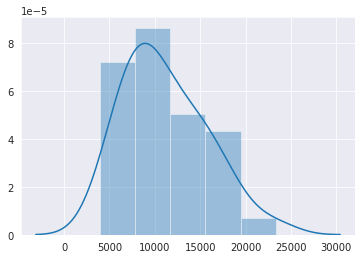

In [0]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(salarios, bins = 5)

# k) (0,5pt) Responda:
k1) Qual é o limite superior da última classe? 
*6 salários mínimos.*

k2) Quais são os limites da classe de maior frequência? 
*8 a 12 salários mínimos.*

k3) Quantos funcionários estão nessa faixa salarial?
*11 funcionários.*

k4) Qual é a forma da distribuição dos dados? 
*Mesocúrtica*

# l) (1pt) Construa um boxplot para a idade dos funcionários. 

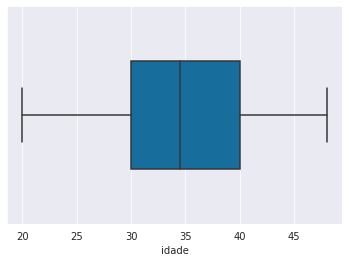

In [0]:
df = data
bplot = sns.boxplot(x = data.idade, 
                 data=df, 
                 width=0.5,
                 palette="colorblind")

# m) (1pt)Responda:
m1) Qual o valor do primeiro quartil?
*30 anos*

m2) Vinte e cinco por cento dos funcionários mais velhos têm de *40 a 48 anos*.

m3) Cinquenta por cento dos funcionários têm de *34 a 39 anos.*

m4) Vinte e cinco por cento dos funcionários mais jovens têm de *20 a 30 anos.*

m5) Qual é a forma da distribuição dos dados? 
*Mesocúrtica e equilibrada, com uma leve tendência para os mais velhos.*

In [0]:
pd.options.display.float_format = '{:,.2f}'.format
data.idade.describe()

count   36.00
mean    34.58
std      6.74
min     20.00
25%     30.00
50%     34.50
75%     40.00
max     48.00
Name: idade, dtype: float64

# Autor: Otávio Celani